<a href="https://colab.research.google.com/github/lukyg/GoFood_Prep/blob/main/CH3P1_Gofood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Studi Case : GoFood Data Preprocessing

## Data Overview

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Case Study Chapter 3 Topic 1_ Dataset Gofood.csv')

In [ ]:
df.head()

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,description
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,NaN,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,NaN,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,NaN,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
3,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,NaN,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
4,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,NaN,0,Sajian Susu Coklat Milo Plus Espresso Dengan R...


In [ ]:
df.shape

(45195, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45195 entries, 0 to 45194
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   merchant_name   45195 non-null  object 
 1   merchant_area   45195 non-null  object 
 2   category        45195 non-null  object 
 3   display         45195 non-null  object 
 4   product         45195 non-null  object 
 5   price           45195 non-null  float64
 6   discount_price  2738 non-null   float64
 7   isDiscount      45195 non-null  int64  
 8   description     21720 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.1+ MB


In [ ]:
df.isnull().sum()

merchant_name         0
merchant_area         0
category              0
display               0
product               0
price                 0
discount_price    42457
isDiscount            0
description       23475
dtype: int64

In [ ]:
#histogram
def histogram(column, title=None, xlabel=None, ylabel=None):
  fig, ax = plt.subplots(figsize=(5,3))
  ax.hist(df[column], color='darkcyan')

  if title:
    ax.set_title(title)
  if title:
    ax.set_xlabel(xlabel)
  if title:
    ax.set_ylabel(ylabel)
  plt.show()

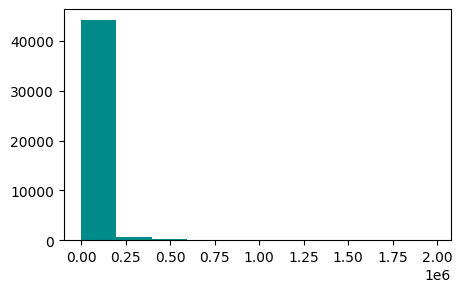

In [ ]:
histogram('price')

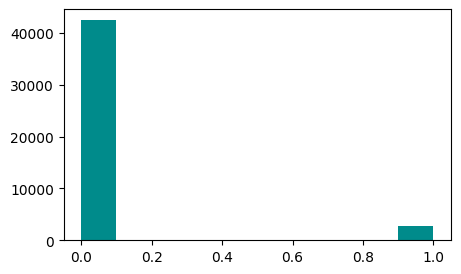

In [ ]:
histogram('isDiscount')

## Preprocessing

Karena nilai discount_price bernilai null sedangkan nilai sebenarnya 0 (karena tidak terdapat diskon), sehingga dilakukan pengecekan terlebih dahulu.

In [ ]:
df_disc = df['isDiscount'] == 0
df_disc

0        True
1        True
2        True
3        True
4        True
         ... 
45190    True
45191    True
45192    True
45193    True
45194    True
Name: isDiscount, Length: 45195, dtype: bool

In [ ]:
df_disc.value_counts()

True     42457
False     2738
Name: isDiscount, dtype: int64

Terlihat bahwa korelasi antara isDiscount dengan discount_price ketika isDiscount bernilai 1 (True), maka discount_price memiliki nilai (tidak null) sedangkan jika isDiscount bernilai 0 maka discount_price memiliki nilai 0 juga. Sehingga perlu di assign untuk discount_price null menjadi nilai angka.

In [ ]:
df['discount_price'].fillna(0, inplace=True)

In [ ]:
df

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,description
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,0.0,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,0.0,0,Sajian Kopi Susu Gula Aren Yang Berbeda Dari K...
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,0.0,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
3,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,0.0,0,Sajian Susu Coklat Milo Dengan Racikan Khas 3 ...
4,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,0.0,0,Sajian Susu Coklat Milo Plus Espresso Dengan R...
...,...,...,...,...,...,...,...,...,...
45190,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET !,1L Hazelnut Choco Milktea,70000.0,0.0,0,1L Hazelnut Choco Milktea
45191,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET !,1L Dolce Latte,80000.0,0.0,0,1L Dolce Latte
45192,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET !,1L Chocoffe,80000.0,0.0,0,1L Chocoffe
45193,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET !,1L Kopi Susu Gula Aren,85000.0,0.0,0,1L Kopi Susu Gula Aren


Pada data ditemukan bahwa description memiliki null sebanyak 23475 data sehingga perlu dianalisa apa yang perlu dilakukan.

In [ ]:
df = df.drop('description', axis=1)
df

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount
0,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Almara Kopi (kopi Susu Gula Aren),20000.0,0.0,0
1,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Almara Kopi (kopi Susu Gula Aren),22000.0,0.0,0
2,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millsis,20000.0,0.0,0
3,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Ice Millsis,20000.0,0.0,0
4,"330 Kopi, Ciledug",jakarta,Kopi/Minuman/Roti,Signature,Hot Millbro,22000.0,0.0,0
...,...,...,...,...,...,...,...,...
45190,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET !,1L Hazelnut Choco Milktea,70000.0,0.0,0
45191,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET !,1L Dolce Latte,80000.0,0.0,0
45192,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET !,1L Chocoffe,80000.0,0.0,0
45193,"Zeger!, Sidoarjo",surabaya,Minuman/Kopi,1L ZEGER BANGET !,1L Kopi Susu Gula Aren,85000.0,0.0,0


In [ ]:
df.isnull().sum()

merchant_name     0
merchant_area     0
category          0
display           0
product           0
price             0
discount_price    0
isDiscount        0
dtype: int64

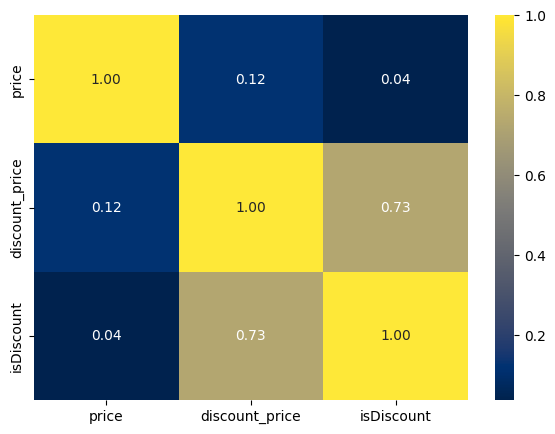

In [ ]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corrMatrix, annot=True, fmt=".2f", cmap="cividis")
plt.show()

In [ ]:
from scipy import stats
import numpy as np

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['price', 'discount_price','isDiscount']:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries

df_outlier = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_outlier)}')

Jumlah baris sebelum memfilter outlier: 45195
Jumlah baris setelah memfilter outlier: 41949


In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['price', 'discount_price','isDiscount']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 45195
Jumlah baris setelah memfilter outlier: 38510


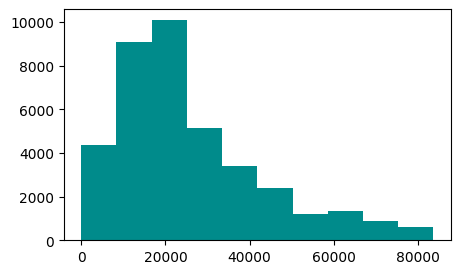

In [ ]:
histogram('price')

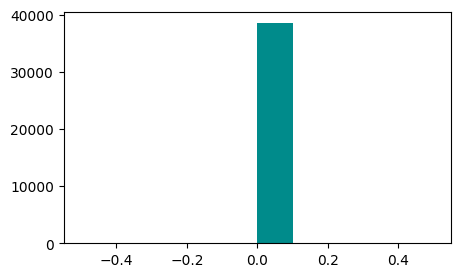

In [ ]:
histogram('isDiscount')

### Merubah string dan karakter

In [ ]:
df[['brand', 'location']] = df['merchant_name'].str.split(',', expand=True, n=2)

In [ ]:
df = df.apply(lambda x: x.astype(str).str.lower())

In [ ]:
df

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,brand,location
0,"330 kopi, ciledug",jakarta,kopi/minuman/roti,signature,hot almara kopi (kopi susu gula aren),20000.0,0.0,0,330 kopi,ciledug
1,"330 kopi, ciledug",jakarta,kopi/minuman/roti,signature,ice almara kopi (kopi susu gula aren),22000.0,0.0,0,330 kopi,ciledug
2,"330 kopi, ciledug",jakarta,kopi/minuman/roti,signature,hot millsis,20000.0,0.0,0,330 kopi,ciledug
3,"330 kopi, ciledug",jakarta,kopi/minuman/roti,signature,ice millsis,20000.0,0.0,0,330 kopi,ciledug
4,"330 kopi, ciledug",jakarta,kopi/minuman/roti,signature,hot millbro,22000.0,0.0,0,330 kopi,ciledug
...,...,...,...,...,...,...,...,...,...,...
45188,"zeger!, sidoarjo",surabaya,minuman/kopi,1l zeger banget !,1l americano,65000.0,0.0,0,zeger!,sidoarjo
45189,"zeger!, sidoarjo",surabaya,minuman/kopi,1l zeger banget !,1l black oreo,70000.0,0.0,0,zeger!,sidoarjo
45190,"zeger!, sidoarjo",surabaya,minuman/kopi,1l zeger banget !,1l hazelnut choco milktea,70000.0,0.0,0,zeger!,sidoarjo
45191,"zeger!, sidoarjo",surabaya,minuman/kopi,1l zeger banget !,1l dolce latte,80000.0,0.0,0,zeger!,sidoarjo


In [ ]:
df['brand'] = df['brand'].str.replace(r'[^\w\s]+','', regex=True)
df['display'] = df['display'].str.replace(r'[^\w\s]+','', regex=True)
df

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,brand,location
0,"330 kopi, ciledug",jakarta,kopi/minuman/roti,signature,hot almara kopi (kopi susu gula aren),20000.0,0.0,0,330 kopi,ciledug
1,"330 kopi, ciledug",jakarta,kopi/minuman/roti,signature,ice almara kopi (kopi susu gula aren),22000.0,0.0,0,330 kopi,ciledug
2,"330 kopi, ciledug",jakarta,kopi/minuman/roti,signature,hot millsis,20000.0,0.0,0,330 kopi,ciledug
3,"330 kopi, ciledug",jakarta,kopi/minuman/roti,signature,ice millsis,20000.0,0.0,0,330 kopi,ciledug
4,"330 kopi, ciledug",jakarta,kopi/minuman/roti,signature,hot millbro,22000.0,0.0,0,330 kopi,ciledug
...,...,...,...,...,...,...,...,...,...,...
45188,"zeger!, sidoarjo",surabaya,minuman/kopi,1l zeger banget,1l americano,65000.0,0.0,0,zeger,sidoarjo
45189,"zeger!, sidoarjo",surabaya,minuman/kopi,1l zeger banget,1l black oreo,70000.0,0.0,0,zeger,sidoarjo
45190,"zeger!, sidoarjo",surabaya,minuman/kopi,1l zeger banget,1l hazelnut choco milktea,70000.0,0.0,0,zeger,sidoarjo
45191,"zeger!, sidoarjo",surabaya,minuman/kopi,1l zeger banget,1l dolce latte,80000.0,0.0,0,zeger,sidoarjo


In [ ]:
df = df.apply(lambda x: x.astype(str).str.strip())
df

,merchant_name,merchant_area,category,display,product,price,discount_price,isDiscount,brand,location
0,"330 kopi, ciledug",jakarta,kopi/minuman/roti,signature,hot almara kopi (kopi susu gula aren),20000.0,0.0,0,330 kopi,ciledug
1,"330 kopi, ciledug",jakarta,kopi/minuman/roti,signature,ice almara kopi (kopi susu gula aren),22000.0,0.0,0,330 kopi,ciledug
2,"330 kopi, ciledug",jakarta,kopi/minuman/roti,signature,hot millsis,20000.0,0.0,0,330 kopi,ciledug
3,"330 kopi, ciledug",jakarta,kopi/minuman/roti,signature,ice millsis,20000.0,0.0,0,330 kopi,ciledug
4,"330 kopi, ciledug",jakarta,kopi/minuman/roti,signature,hot millbro,22000.0,0.0,0,330 kopi,ciledug
...,...,...,...,...,...,...,...,...,...,...
45188,"zeger!, sidoarjo",surabaya,minuman/kopi,1l zeger banget,1l americano,65000.0,0.0,0,zeger,sidoarjo
45189,"zeger!, sidoarjo",surabaya,minuman/kopi,1l zeger banget,1l black oreo,70000.0,0.0,0,zeger,sidoarjo
45190,"zeger!, sidoarjo",surabaya,minuman/kopi,1l zeger banget,1l hazelnut choco milktea,70000.0,0.0,0,zeger,sidoarjo
45191,"zeger!, sidoarjo",surabaya,minuman/kopi,1l zeger banget,1l dolce latte,80000.0,0.0,0,zeger,sidoarjo


In [ ]:
df = df.drop('merchant_name', axis=1)
df

,merchant_area,category,display,product,price,discount_price,isDiscount,brand,location
0,jakarta,kopi/minuman/roti,signature,hot almara kopi (kopi susu gula aren),20000.0,0.0,0,330 kopi,ciledug
1,jakarta,kopi/minuman/roti,signature,ice almara kopi (kopi susu gula aren),22000.0,0.0,0,330 kopi,ciledug
2,jakarta,kopi/minuman/roti,signature,hot millsis,20000.0,0.0,0,330 kopi,ciledug
3,jakarta,kopi/minuman/roti,signature,ice millsis,20000.0,0.0,0,330 kopi,ciledug
4,jakarta,kopi/minuman/roti,signature,hot millbro,22000.0,0.0,0,330 kopi,ciledug
...,...,...,...,...,...,...,...,...,...
45188,surabaya,minuman/kopi,1l zeger banget,1l americano,65000.0,0.0,0,zeger,sidoarjo
45189,surabaya,minuman/kopi,1l zeger banget,1l black oreo,70000.0,0.0,0,zeger,sidoarjo
45190,surabaya,minuman/kopi,1l zeger banget,1l hazelnut choco milktea,70000.0,0.0,0,zeger,sidoarjo
45191,surabaya,minuman/kopi,1l zeger banget,1l dolce latte,80000.0,0.0,0,zeger,sidoarjo


Sehingga dapat disimplkan bahwa ada sedikit merchant yang memberikan diskon. Untuk model yang digunakan yaitu clustering dengan mengelompokkan pelanggan yakni segmentasi pelanggan